In [1]:
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


add 'Data' and 'model' folder in content

In [4]:
!cp /content/drive/MyDrive/COVID_data.zip  /content/Data/
!cd /content/Data && unzip COVID_data.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: train/Normal/Normal-1586.png  
  inflating: train/Normal/Normal-1587.png  
  inflating: train/Normal/Normal-1589.png  
  inflating: train/Normal/Normal-159.png  
  inflating: train/Normal/Normal-1593.png  
  inflating: train/Normal/Normal-1596.png  
  inflating: train/Normal/Normal-16.png  
  inflating: train/Normal/Normal-1601.png  
  inflating: train/Normal/Normal-1604.png  
  inflating: train/Normal/Normal-1605.png  
  inflating: train/Normal/Normal-1606.png  
  inflating: train/Normal/Normal-1607.png  
  inflating: train/Normal/Normal-1608.png  
  inflating: train/Normal/Normal-1609.png  
  inflating: train/Normal/Normal-1610.png  
  inflating: train/Normal/Normal-1611.png  
  inflating: train/Normal/Normal-1612.png  
  inflating: train/Normal/Normal-1613.png  
  inflating: train/Normal/Normal-1614.png  
  inflating: train/Normal/Normal-1615.png  
  inflating: train/Normal/Normal-1616.png  
  inflating: train/Normal/Normal-1617.png  
  i

In [5]:
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import numpy as np
import sys
sys.path.append('/content/drive/MyDrive')
import matplotlib.pyplot as plt
from Inception_Resnet_2 import InceptionResNetV2

In [6]:
def transform(img):
    tensor_trans = transforms.ToTensor()
    tensor_norm = transforms.Normalize([0.5106141, 0.5106141, 0.5106141], [0.22819537, 0.22819537, 0.22819537])
    # tensor_resize = transform.Resize()
    tensor_f = transforms.Compose([tensor_trans, tensor_norm])
    return tensor_f(img)
epochs = 8
batch_size = 32
learning_rate_dict = {1: 0.001, 2: 0.001, 3: 4e-4, 4: 4e-4, 5: 1e-4, 
                      6: 1e-4, 7: 4e-5, 8: 4e-5, 9: 1e-5, 10: 1e-5, 
                      11: 4e-6, 12: 4e-6, 13: 1e-6, 14: 1e-6}
classnum = 3
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [7]:
model = InceptionResNetV2(num_classes=classnum).to(device)
criterion = nn.CrossEntropyLoss().to(device)

In [8]:
epoch_pre = 0

In [8]:
model.load_state_dict(torch.load(f'/content/model/model1_{epoch_pre}epoch.pth'))

<All keys matched successfully>

In [9]:
model

InceptionResNetV2(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [10]:
train_dir = r'/content/Data/train'
train_data = ImageFolder(train_dir, transform=transform)
val_dir = r'/content/Data/val'
val_data = ImageFolder(val_dir, transform=transform)
test_dir = r'/content/Data/test'
test_data = ImageFolder(test_dir, transform=transform)


print(f'train: {len(train_data)} belonging to {len(train_data.classes)} classes')
print(f'val: {len(val_data)} belonging to {len(val_data.classes)} classes')
print(f'test: {len(test_data)} belonging to {len(test_data.classes)} classes')

train: 10672 belonging to 3 classes
val: 1523 belonging to 3 classes
test: 3052 belonging to 3 classes


In [11]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [12]:
train_loss = []
val_loss = []
train_epochs_loss = []
val_epochs_loss = []

train - epoch: 1/8 --- 10%
train - epoch: 1/8 --- 20%
train - epoch: 1/8 --- 30%
train - epoch: 1/8 --- 40%
train - epoch: 1/8 --- 50%
train - epoch: 1/8 --- 60%
train - epoch: 1/8 --- 70%
train - epoch: 1/8 --- 80%
train - epoch: 1/8 --- 90%
train - epoch: 1/8 --- 100%

train - epoch: 1/8 Finished
            accuracy: 0.7624625563621521, loss: 0.5960303974633445
            --------------------------------------------------------------------------
val - for epoch: 1/8 --- 50%
val - for epoch: 1/8 --- 100%

val - for epoch: 1/8 Finished
            accuracy: 0.7885751724243164, loss: 0.5177298138538996
            --------------------------------------------------------------------------


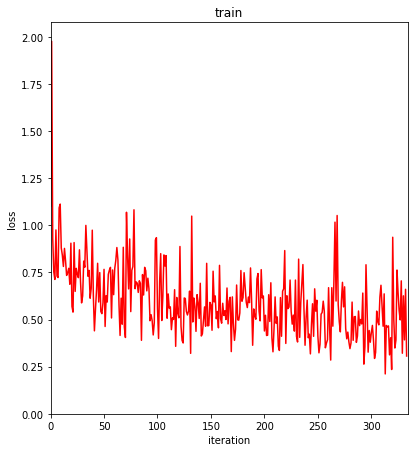

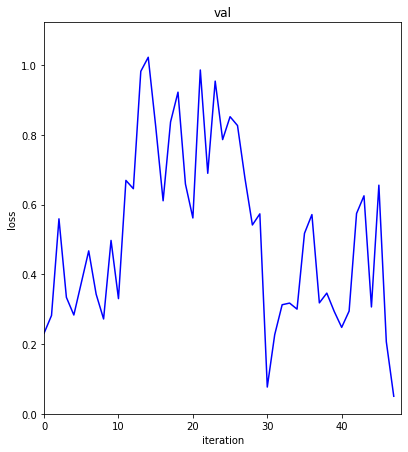

train - epoch: 2/8 --- 10%
train - epoch: 2/8 --- 20%
train - epoch: 2/8 --- 30%
train - epoch: 2/8 --- 40%
train - epoch: 2/8 --- 50%
train - epoch: 2/8 --- 60%
train - epoch: 2/8 --- 70%
train - epoch: 2/8 --- 80%
train - epoch: 2/8 --- 90%
train - epoch: 2/8 --- 100%

train - epoch: 2/8 Finished
            accuracy: 0.8328335881233215, loss: 0.44009136591485876
            --------------------------------------------------------------------------
val - for epoch: 2/8 --- 50%
val - for epoch: 2/8 --- 100%

val - for epoch: 2/8 Finished
            accuracy: 0.8043335676193237, loss: 0.49255582100401324
            --------------------------------------------------------------------------


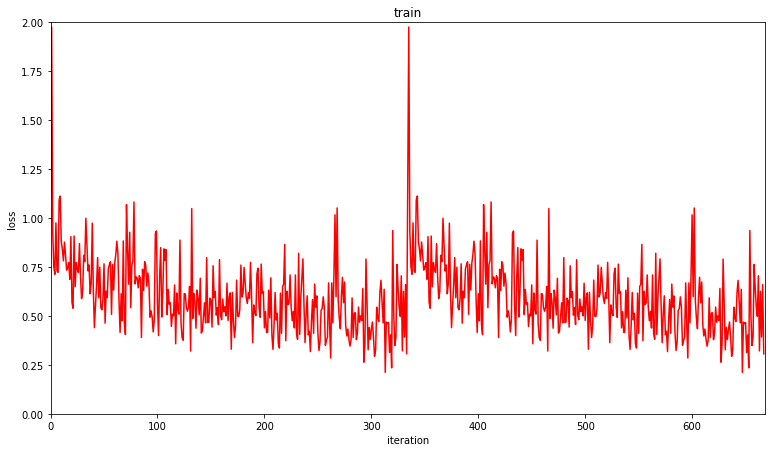

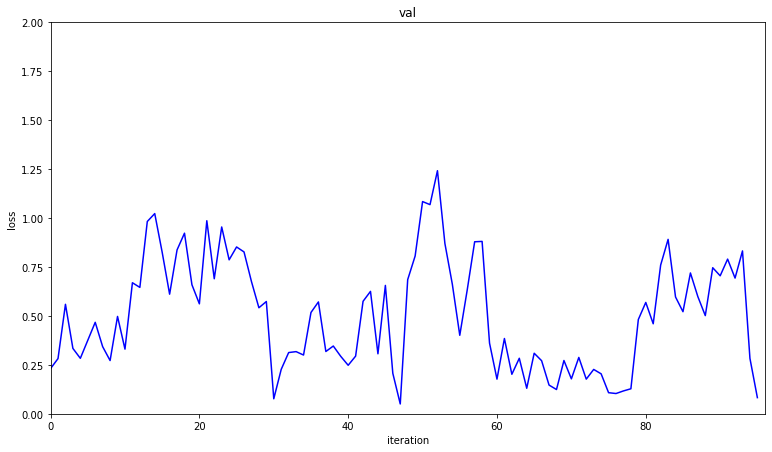

train - epoch: 3/8 --- 10%
train - epoch: 3/8 --- 20%
train - epoch: 3/8 --- 30%
train - epoch: 3/8 --- 40%
train - epoch: 3/8 --- 50%
train - epoch: 3/8 --- 60%
train - epoch: 3/8 --- 70%
train - epoch: 3/8 --- 80%
train - epoch: 3/8 --- 90%
train - epoch: 3/8 --- 100%

train - epoch: 3/8 Finished
            accuracy: 0.8854010701179504, loss: 0.29952571344768214
            --------------------------------------------------------------------------
val - for epoch: 3/8 --- 50%
val - for epoch: 3/8 --- 100%

val - for epoch: 3/8 Finished
            accuracy: 0.880499005317688, loss: 0.2997128885084142
            --------------------------------------------------------------------------


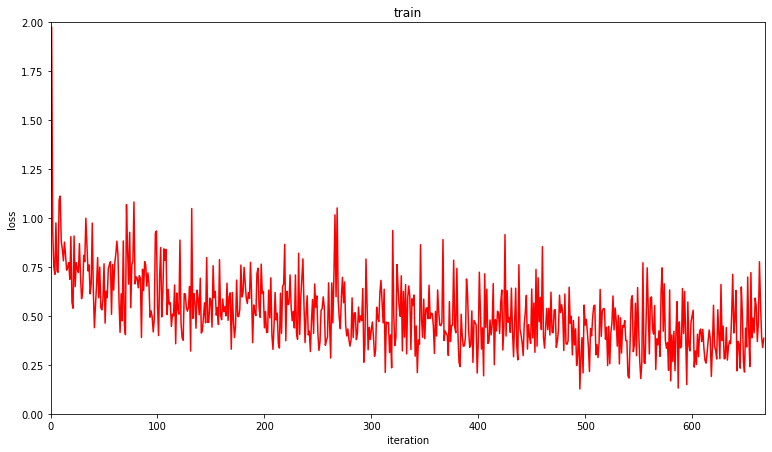

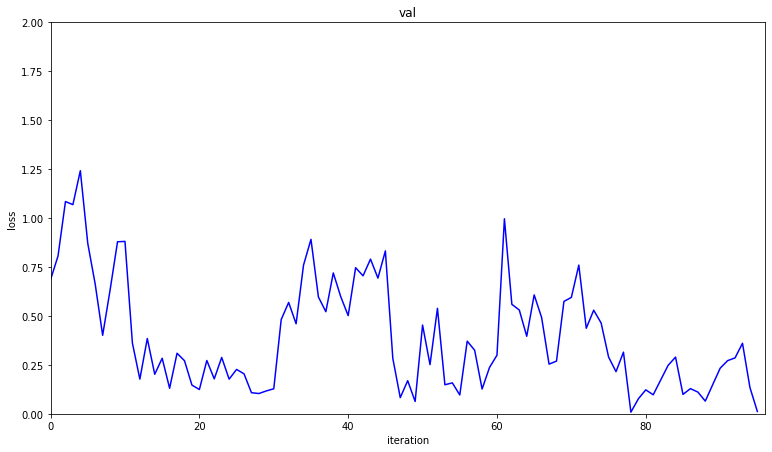

train - epoch: 4/8 --- 10%
train - epoch: 4/8 --- 20%
train - epoch: 4/8 --- 30%
train - epoch: 4/8 --- 40%
train - epoch: 4/8 --- 50%
train - epoch: 4/8 --- 60%
train - epoch: 4/8 --- 70%
train - epoch: 4/8 --- 80%
train - epoch: 4/8 --- 90%
train - epoch: 4/8 --- 100%

train - epoch: 4/8 Finished
            accuracy: 0.906578004360199, loss: 0.2496285980823868
            --------------------------------------------------------------------------
val - for epoch: 4/8 --- 50%
val - for epoch: 4/8 --- 100%

val - for epoch: 4/8 Finished
            accuracy: 0.9015101790428162, loss: 0.2674226911428074
            --------------------------------------------------------------------------


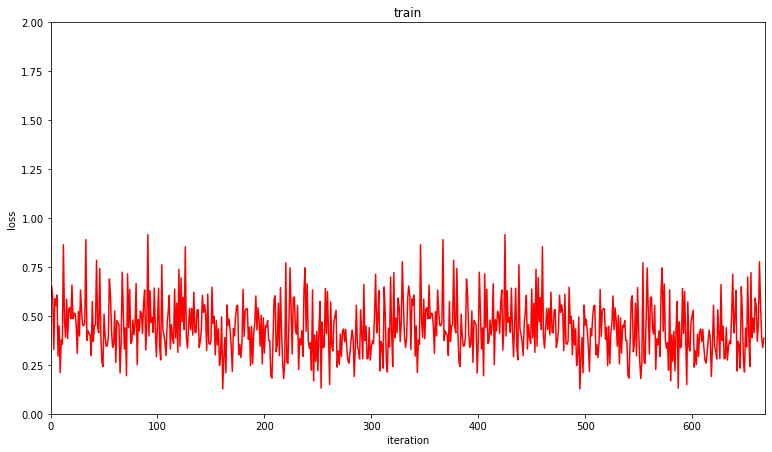

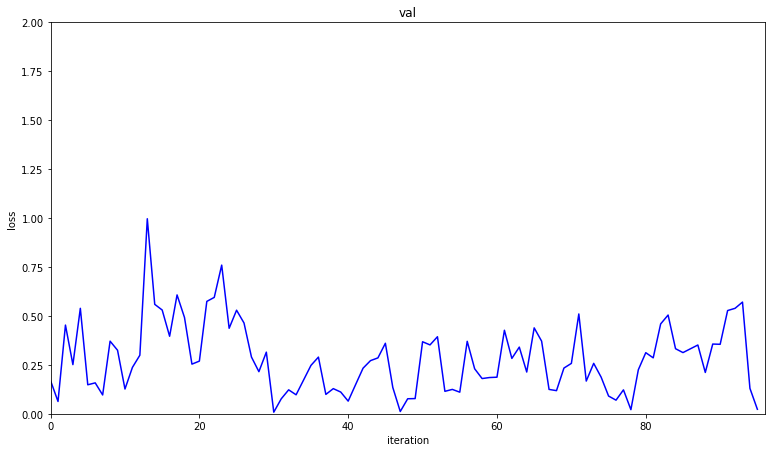

train - epoch: 5/8 --- 10%
train - epoch: 5/8 --- 20%
train - epoch: 5/8 --- 30%
train - epoch: 5/8 --- 40%
train - epoch: 5/8 --- 50%
train - epoch: 5/8 --- 60%
train - epoch: 5/8 --- 70%
train - epoch: 5/8 --- 80%
train - epoch: 5/8 --- 90%
train - epoch: 5/8 --- 100%

train - epoch: 5/8 Finished
            accuracy: 0.9336581826210022, loss: 0.180206816732705
            --------------------------------------------------------------------------
val - for epoch: 5/8 --- 50%
val - for epoch: 5/8 --- 100%

val - for epoch: 5/8 Finished
            accuracy: 0.9290873408317566, loss: 0.21257950429571792
            --------------------------------------------------------------------------


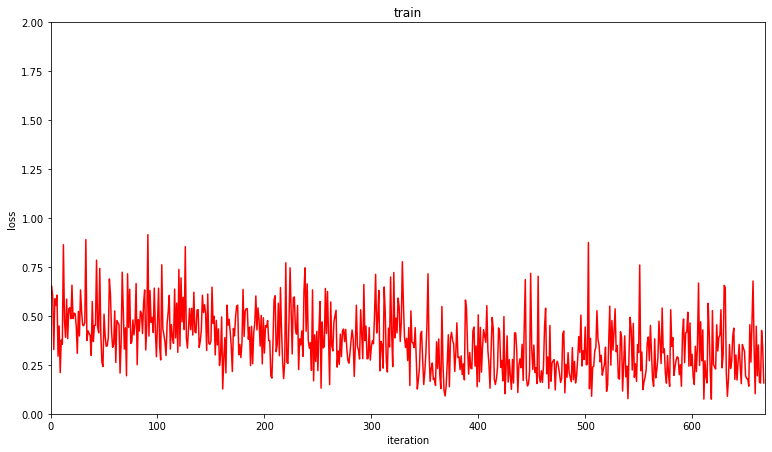

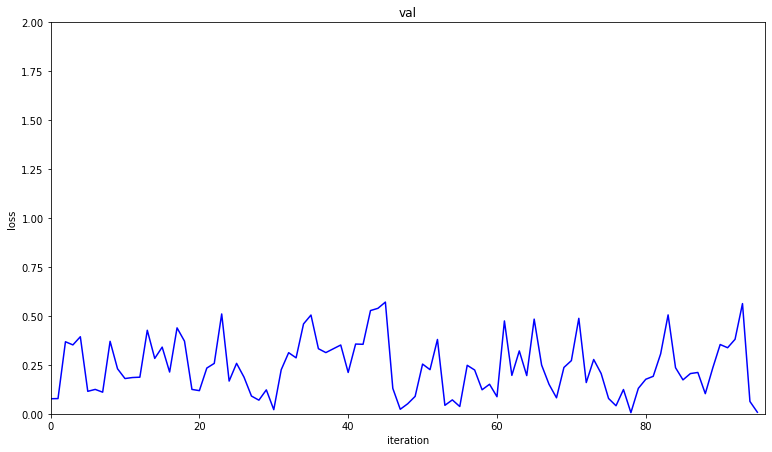

train - epoch: 6/8 --- 10%
train - epoch: 6/8 --- 20%
train - epoch: 6/8 --- 30%
train - epoch: 6/8 --- 40%
train - epoch: 6/8 --- 50%
train - epoch: 6/8 --- 60%
train - epoch: 6/8 --- 70%
train - epoch: 6/8 --- 80%
train - epoch: 6/8 --- 90%
train - epoch: 6/8 --- 100%

train - epoch: 6/8 Finished
            accuracy: 0.9429348111152649, loss: 0.15740895092286572
            --------------------------------------------------------------------------
val - for epoch: 6/8 --- 50%
val - for epoch: 6/8 --- 100%

val - for epoch: 6/8 Finished
            accuracy: 0.9238345623016357, loss: 0.21019717249631262
            --------------------------------------------------------------------------


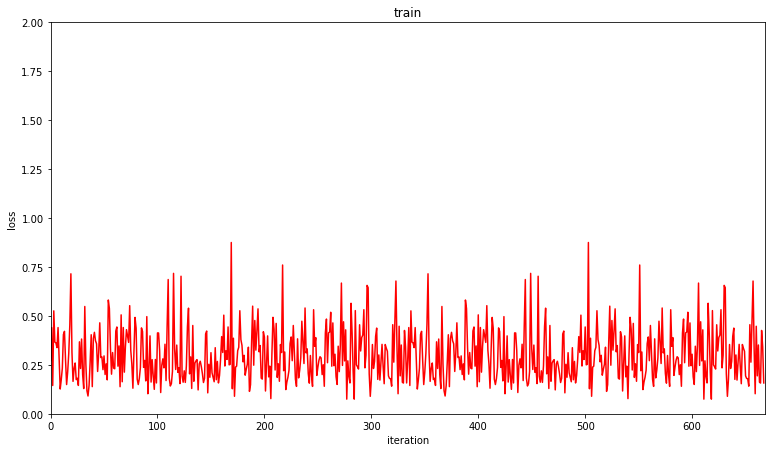

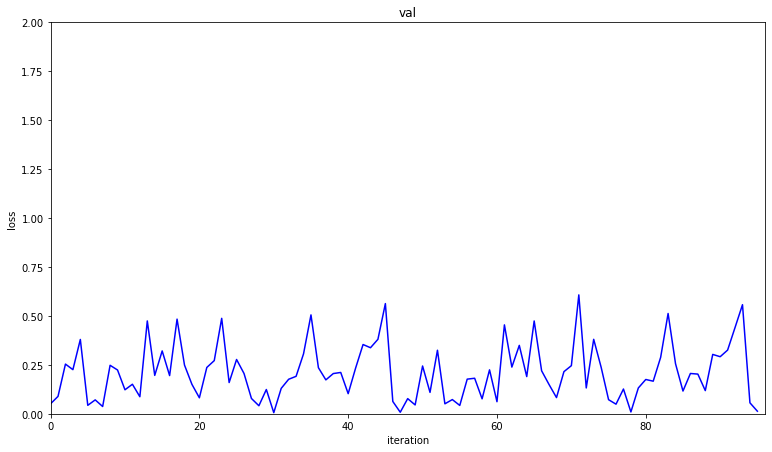

train - epoch: 7/8 --- 10%
train - epoch: 7/8 --- 20%
train - epoch: 7/8 --- 30%
train - epoch: 7/8 --- 40%
train - epoch: 7/8 --- 50%
train - epoch: 7/8 --- 60%
train - epoch: 7/8 --- 70%
train - epoch: 7/8 --- 80%
train - epoch: 7/8 --- 90%
train - epoch: 7/8 --- 100%

train - epoch: 7/8 Finished
            accuracy: 0.9523988366127014, loss: 0.1324758306759114
            --------------------------------------------------------------------------
val - for epoch: 7/8 --- 50%
val - for epoch: 7/8 --- 100%

val - for epoch: 7/8 Finished
            accuracy: 0.9271175265312195, loss: 0.20230652978837801
            --------------------------------------------------------------------------


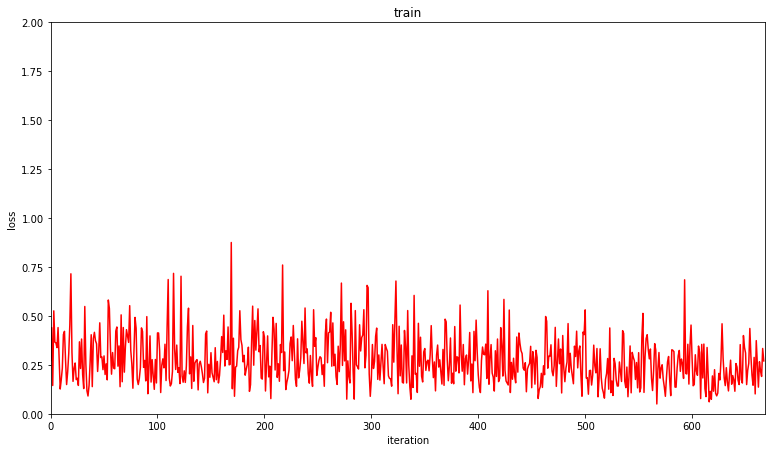

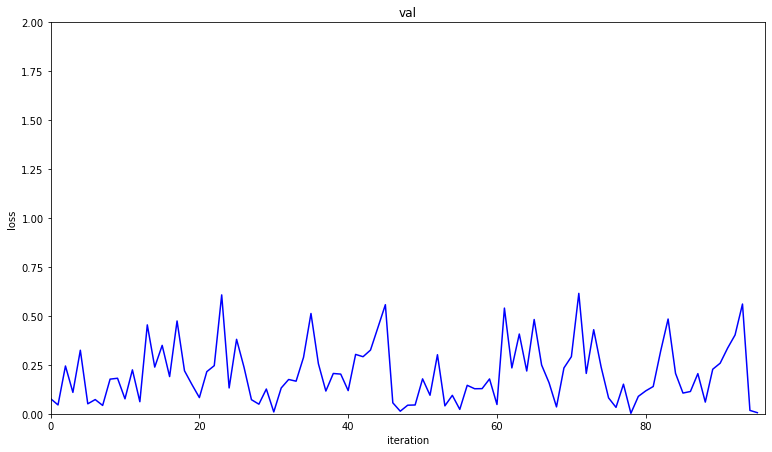

train - epoch: 8/8 --- 10%
train - epoch: 8/8 --- 20%
train - epoch: 8/8 --- 30%
train - epoch: 8/8 --- 40%
train - epoch: 8/8 --- 50%
train - epoch: 8/8 --- 60%
train - epoch: 8/8 --- 70%
train - epoch: 8/8 --- 80%
train - epoch: 8/8 --- 90%
train - epoch: 8/8 --- 100%

train - epoch: 8/8 Finished
            accuracy: 0.9546477198600769, loss: 0.1239730748989268
            --------------------------------------------------------------------------
val - for epoch: 8/8 --- 50%
val - for epoch: 8/8 --- 100%

val - for epoch: 8/8 Finished
            accuracy: 0.9284307360649109, loss: 0.20406520517038493
            --------------------------------------------------------------------------


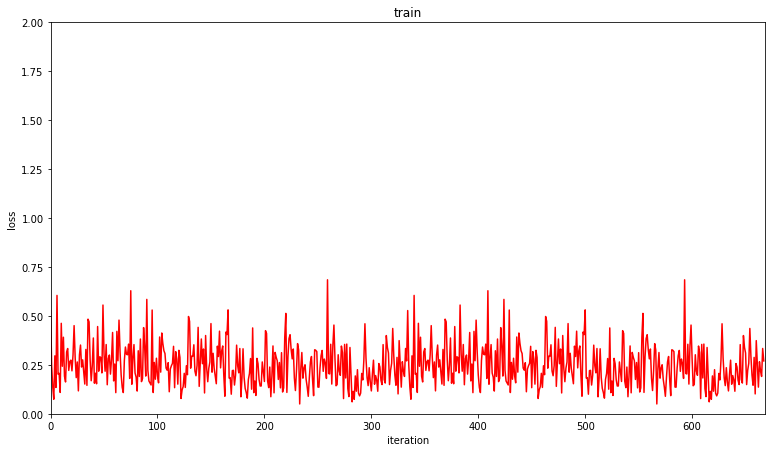

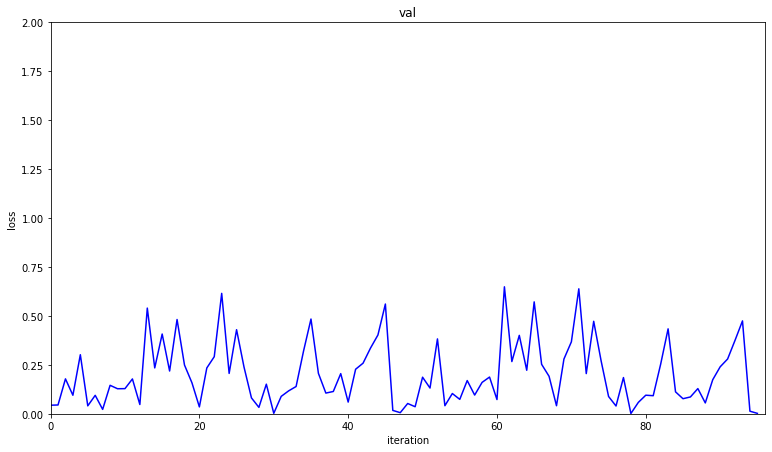

In [13]:
for epoch in range(epoch_pre, epochs):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate_dict[epoch+1])
    train_epoch_loss = []
    i = 0
    epoch_train_acc = 0.0
    for index, (inputs, lbl) in enumerate(train_loader):
        inputs = inputs.to(torch.float32).to(device)
        lbl = lbl.to(torch.long).to(device)
        outputs = model(inputs)
        optimizer.zero_grad()
        loss = criterion(outputs, lbl)
        loss.backward()
        optimizer.step()
        train_epoch_loss.append(loss.item())
        train_acc = (outputs.argmax(dim=1)==lbl).sum()
        epoch_train_acc += train_acc
        if (index+1)%(len(train_loader)//10) == 0:
            i += 1
            print(f'train - epoch: {epoch+1}/{epochs} --- {i*10}%')
    train_epochs_loss.append(np.average(train_epoch_loss))
    train_loss.append(train_epoch_loss)
    print(f'\ntrain - epoch: {epoch+1}/{epochs} Finished\n\
            accuracy: {epoch_train_acc/len(train_data)}, loss: {np.average(train_epoch_loss)}\n\
            --------------------------------------------------------------------------')
    train_loss.append(train_epoch_loss)
    
    model.eval()
    val_epoch_loss = []
    i = 0
    epoch_val_acc = 0.0
    for index, (inputs, lbl) in enumerate(val_loader):
        inputs = inputs.to(torch.float32).to(device)
        lbl = lbl.to(torch.long).to(device)
        outputs = model(inputs)
        loss = criterion(outputs, lbl)
        val_epoch_loss.append(loss.item())
        val_acc = (outputs.argmax(dim=1)==lbl).sum()
        epoch_val_acc += val_acc
        if (index+1)%(len(val_loader)//2) == 0:
            i += 1
            print(f'val - for epoch: {epoch+1}/{epochs} --- {i*50}%')
    val_epochs_loss.append(np.average(val_epoch_loss))
    val_loss.append(val_epoch_loss)
    print(f'\nval - for epoch: {epoch+1}/{epochs} Finished\n\
            accuracy: {epoch_val_acc/len(val_data)}, loss: {np.average(val_epoch_loss)}\n\
            --------------------------------------------------------------------------')
    
    torch.save(model.state_dict(), f'/content/model/model1_{epoch+1}epoch.pth')
    if epoch-epoch_pre > 0:
        plt.figure(figsize=(12.8, 7.2)), plt.title('train'), plt.plot(train_loss[epoch-epoch_pre-1]+train_loss[epoch-epoch_pre], 'r-')
        plt.axis([0, 2*len(train_epoch_loss), 0, 2.0]), plt.xlabel('iteration'), plt.ylabel('loss')
        plt.show()
        plt.figure(figsize=(12.8, 7.2)), plt.title('val'), plt.plot(val_loss[epoch-epoch_pre-1]+val_loss[epoch-epoch_pre], 'b-')
        plt.axis([0, 2*len(val_epoch_loss), 0, 2.0]), plt.xlabel('iteration'), plt.ylabel('loss')
        plt.show()
    else:
        plt.figure(figsize=(6.4, 7.2)), plt.title('train'), plt.plot(train_loss[epoch-epoch_pre], 'r-')
        plt.axis([0, len(train_epoch_loss), 0, max(train_loss[0])+0.1]), plt.xlabel('iteration'), plt.ylabel('loss')
        plt.show()
        plt.figure(figsize=(6.4, 7.2)), plt.title('val'), plt.plot(val_loss[epoch-epoch_pre], 'b-')
        plt.axis([0, len(val_epoch_loss), 0, max(val_loss[0])+0.1]), plt.xlabel('iteration'), plt.ylabel('loss')
        plt.show()      


In [14]:
model.eval()
test_loss = []
epoch_test_acc = 0.0
for index, (inputs, lbl) in enumerate(test_loader):
  inputs = inputs.to(torch.float32).to(device)
  lbl = lbl.to(torch.long).to(device)
  outputs = model(inputs)
  loss = criterion(outputs, lbl)
  test_loss.append(loss.item())
  test_acc = (outputs.argmax(dim=1)==lbl).sum()
  epoch_test_acc += test_acc

print(f'test Finished --- accuracy: {epoch_test_acc/len(test_data)}, loss: {np.average(test_loss)}')

test Finished --- accuracy: 0.9384011030197144, loss: 0.17827248636764825


In [15]:
print(train_loss, val_loss)

[[1.101030707359314, 1.976426124572754, 0.9317725896835327, 0.7529124021530151, 0.7127620577812195, 0.9754762053489685, 0.730763852596283, 0.7229123115539551, 1.092782974243164, 1.1125606298446655, 0.879833996295929, 0.8417888283729553, 0.7817268967628479, 0.8774789571762085, 0.8119078278541565, 0.7341516613960266, 0.7487877607345581, 0.7719358205795288, 0.6874281764030457, 0.9051363468170166, 0.5696192383766174, 0.5394136905670166, 0.9083723425865173, 0.6494531035423279, 0.7718526124954224, 0.7401914596557617, 0.7223005294799805, 0.8699173927307129, 0.7014033198356628, 0.5884318351745605, 0.6252389550209045, 0.8101060390472412, 0.7776222229003906, 0.9995314478874207, 0.8706851005554199, 0.7296792268753052, 0.7606942057609558, 0.6131323575973511, 0.6658534407615662, 0.974177896976471, 0.6270716786384583, 0.4400874078273773, 0.5554144978523254, 0.6579653024673462, 0.798443615436554, 0.5931655764579773, 0.7491714954376221, 0.5429699420928955, 0.531254231929779, 0.5884618163108826, 0.7662